In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
sns.set(style='whitegrid', palette='crest')

In [3]:
green=pd.read_csv('greentripmuestranormalizadamodificado.csv')

In [4]:
green.drop(columns=['Unnamed: 0'], inplace=True)
green['Hora recogida'] = pd.to_datetime(green['Hora recogida'])

In [5]:
green.head()

,Proveedor TPEP,Hora recogida,Hora destino,PULocationID,Distrito recogida,ID lugar llegada,Distrito llegada,Distancia viaje,Costo tarifa,Total,Peajes,Tipo pago,Año recogida,Mes recogida,Día recogida,Día semana recogida
0,2,2021-01-02 17:02:00,2021-01-02 17:11:00,97,Brooklyn,17,Manhattan,1.83,23.07,26.12,0.0,NaN,2021,1,2,Saturday
1,2,2021-01-09 10:20:26,2021-01-09 10:27:45,41,Manhattan,42,Manhattan,1.54,7.50,8.30,0.0,2.0,2021,1,9,Saturday
2,2,2021-01-29 18:28:00,2021-01-29 18:54:00,177,Queens,39,Manhattan,4.14,23.31,26.36,0.0,NaN,2021,1,29,Friday
3,2,2021-01-06 16:21:47,2021-01-06 16:30:43,41,Manhattan,166,Brooklyn,1.67,8.50,11.30,0.0,1.0,2021,1,6,Wednesday
4,1,2021-01-26 16:40:12,2021-01-26 16:54:51,41,Manhattan,168,Queens,2.90,12.00,17.90,0.0,1.0,2021,1,26,Tuesday


In [6]:
green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16778 entries, 0 to 16777
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Proveedor TPEP       16778 non-null  int64         
 1   Hora recogida        16778 non-null  datetime64[ns]
 2   Hora destino         16778 non-null  object        
 3   PULocationID         16778 non-null  int64         
 4   Distrito recogida    16778 non-null  object        
 5   ID lugar llegada     16778 non-null  int64         
 6   Distrito llegada     16775 non-null  object        
 7   Distancia viaje      16778 non-null  float64       
 8   Costo tarifa         16778 non-null  float64       
 9   Total                16778 non-null  float64       
 10  Peajes               16778 non-null  float64       
 11  Tipo pago            14684 non-null  float64       
 12  Año recogida         16778 non-null  int64         
 13  Mes recogida         16778 non-

In [7]:
green.isnull().sum

<bound method DataFrame.sum of        Proveedor TPEP  Hora recogida  Hora destino  PULocationID  \
0               False          False         False         False   
1               False          False         False         False   
2               False          False         False         False   
3               False          False         False         False   
4               False          False         False         False   
...               ...            ...           ...           ...   
16773           False          False         False         False   
16774           False          False         False         False   
16775           False          False         False         False   
16776           False          False         False         False   
16777           False          False         False         False   

       Distrito recogida  ID lugar llegada  Distrito llegada  Distancia viaje  \
0                  False             False             False           

In [8]:
green.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
16773    False
16774    False
16775    False
16776    False
16777    False
Length: 16778, dtype: bool>

In [9]:
green.describe()

,Proveedor TPEP,Hora recogida,PULocationID,ID lugar llegada,Distancia viaje,Costo tarifa,Total,Peajes,Tipo pago,Año recogida,Mes recogida,Día recogida
count,16778.000000,16778,16778.000000,16778.000000,16778.000000,16778.000000,16778.000000,16778.000000,14684.000000,16778.000000,16778.000000,16778.000000
mean,1.865896,2022-10-31 02:32:50.348492032,100.900465,138.296400,69.178501,17.542079,22.180293,0.302595,1.358962,2022.362916,6.137382,15.473000
min,1.000000,2021-01-01 06:12:44,1.000000,1.000000,0.000000,-70.000000,-71.500000,0.000000,1.000000,2021.000000,1.000000,1.000000
25%,2.000000,2021-11-30 21:52:07.249999872,66.000000,74.000000,1.180000,8.600000,11.800000,0.000000,1.000000,2021.000000,3.000000,8.000000
50%,2.000000,2022-10-31 17:12:50,75.000000,138.000000,2.010000,13.200000,17.600000,0.000000,1.000000,2022.000000,6.000000,15.000000
75%,2.000000,2023-09-30 19:19:30.500000,130.000000,217.000000,3.847500,21.000000,26.800000,0.000000,2.000000,2023.000000,9.000000,23.000000
max,2.000000,2024-08-31 23:22:49,265.000000,265.000000,152701.680000,547.600000,549.100000,19.690000,5.000000,2024.000000,12.000000,31.000000
std,0.340774,NaN,63.188395,76.703477,2419.664854,15.978823,17.728473,1.433115,0.503134,1.067971,3.361514,8.773094


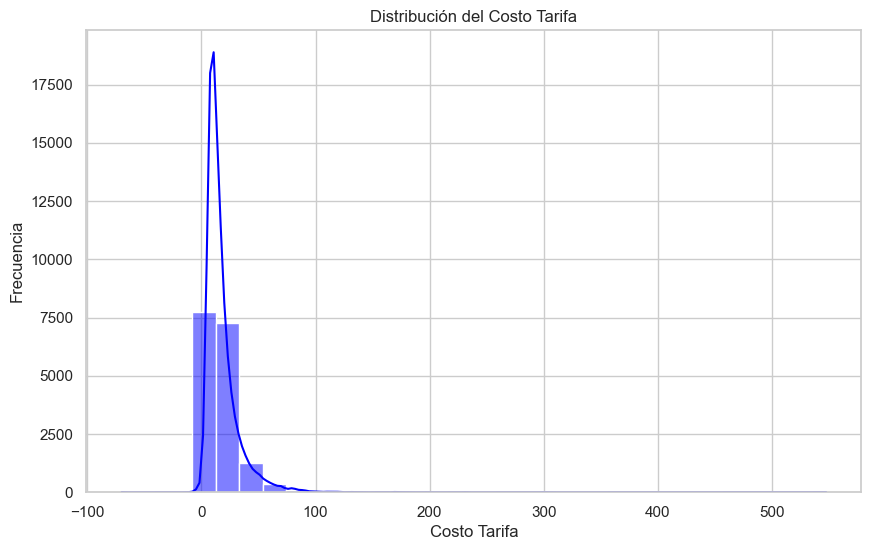

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(green['Costo tarifa'], bins=30, kde=True, color='blue')
plt.title('Distribución del Costo Tarifa')
plt.xlabel('Costo Tarifa')
plt.ylabel('Frecuencia')
plt.show()


### Del gráfico se infiere que: 
### Mayoría de costos bajos: 
La mayoría de los viajes tienen un costo de tarifa relativamente bajo.
#### Pocos viajes muy costosos:
Aunque son pocos en comparación con los viajes baratos, existe un grupo de viajes con costos de tarifa significativamente más altos que el promedio. Estos viajes podrían ser outliers o representar situaciones especiales.
#### Pico pronunciado: 
El histograma muestra un pico muy pronunciado alrededor de los 20-30. Esto sugiere que existe un grupo significativo de viajes con un costo de tarifa similar.
#### Cola larga: 
La cola derecha del histograma es muy larga, lo que indica que hay una gran variabilidad en los costos de las tarifas altas.

Identificación de outliers en el precio.

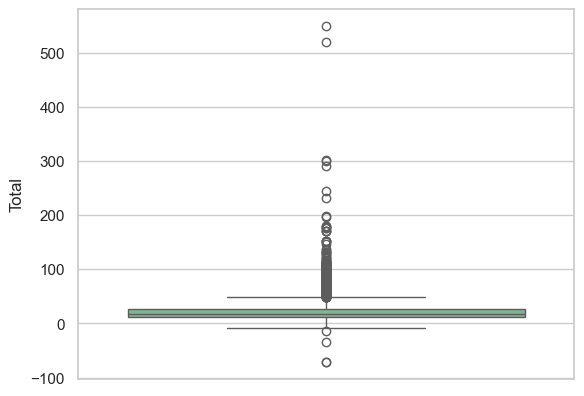

In [11]:
sns.boxplot(green['Total']);

### Del gráfico se infiere que: 
#### Mayoría de valores bajos: 
La gran mayoría de los valores de "Total" se encuentran entre 0 y 100, con una mediana cercana a 50. Esto indica que la mayoría de los datos están concentrados en la parte inferior del rango.
#### Presencia de valores atípicos: 
Hay varios valores atípicos, tanto por encima como por debajo del rango intercuartílico. Estos valores atípicos podrían representar situaciones especiales o errores en los datos.
#### Distribución asimétrica:
La distribución de los datos parece ser asimétrica, con una cola más larga hacia los valores altos. Esto indica que hay algunos valores muy grandes que están alejando la media de la mediana.

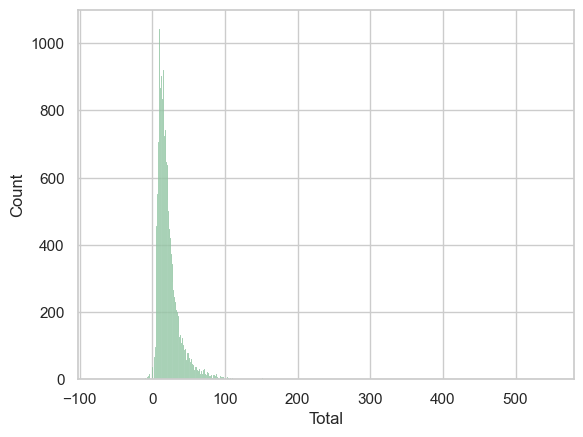

In [12]:
sns.histplot(green['Total'], palette='crest')
plt.ylim(0,1100);

### Del gráfico podemos inferir que: 
#### Concentración de valores bajos: 
La gran mayoría de los valores de "Total" se encuentran entre 0 y 100. Esto significa que la mayoría de las observaciones tienen un valor de "Total" relativamente bajo.
#### Asimetría positiva:
La distribución de los datos es asimétrica positiva. Esto significa que hay una cola larga hacia la derecha, con algunos valores muy altos de "Total".
#### Pocos valores negativos: 
Hay una pequeña cantidad de valores negativos de "Total". Esto podría indicar errores en los datos, devoluciones o alguna otra situación especial.

Descripción estadística de los precios del dataframe

In [13]:
green['Costo tarifa'].describe()

count    16778.000000
mean        17.542079
std         15.978823
min        -70.000000
25%          8.600000
50%         13.200000
75%         21.000000
max        547.600000
Name: Costo tarifa, dtype: float64

In [14]:
max_price = green['Costo tarifa'].max()                 
median_price = np.mean(green['Costo tarifa'])           
q1 = np.quantile(green['Costo tarifa'], q=0.25)         
q3 = np.quantile(green['Costo tarifa'], q=0.75)         
iqr = q3 - q1                                       
lim_sup = q3 + 1.5*iqr  

Precio máximo y trayecto asociado

In [15]:
precio_max_fila = green.loc[green['Costo tarifa'].idxmax()]
distrito_recogida = precio_max_fila['Distrito recogida']
distrito_llegada = precio_max_fila['Distrito llegada']
print(f'El precio máximo es {max_price} y corresponde al trayecto desde {distrito_recogida} hasta {distrito_llegada}')

El precio máximo es 547.6 y corresponde al trayecto desde Manhattan hasta Manhattan


In [16]:
precio_max_fila = green.loc[green['Costo tarifa'].idxmax()]
distancia = precio_max_fila['Distancia viaje']
print(f'El precio máximo es {max_price} y corresponde al trayecto de {distancia} millas')

El precio máximo es 547.6 y corresponde al trayecto de 75.27 millas


Identificación de outliers

In [17]:
outliers = green[green['Costo tarifa'] > lim_sup][['Distancia viaje','Costo tarifa']]
print('Los viajes con precio outlier son:\n')
for idx, row in outliers.iterrows():
    print(f"Una distancia de {row['Distancia viaje']} millas hasta con un costo de {row['Costo tarifa']}")

Los viajes con precio outlier son:

Una distancia de 15.72 millas hasta con un costo de 56.95
Una distancia de 14.49 millas hasta con un costo de 46.44
Una distancia de 24.9 millas hasta con un costo de 71.0
Una distancia de 14.23 millas hasta con un costo de 40.5
Una distancia de 16.55 millas hasta con un costo de 50.0
Una distancia de 38.33 millas hasta con un costo de 44.34
Una distancia de 17.7 millas hasta con un costo de 47.06
Una distancia de 25.6 millas hasta con un costo de 79.33
Una distancia de 15.96 millas hasta con un costo de 51.0
Una distancia de 11.75 millas hasta con un costo de 47.98
Una distancia de 11.27 millas hasta con un costo de 41.97
Una distancia de 28.23 millas hasta con un costo de 85.0
Una distancia de 19.08 millas hasta con un costo de 49.01
Una distancia de 29.4 millas hasta con un costo de 78.0
Una distancia de 19.71 millas hasta con un costo de 56.0
Una distancia de 14.31 millas hasta con un costo de 42.5
Una distancia de 9.58 millas hasta con un costo 

In [18]:
outliers.count()

Distancia viaje    1171
Costo tarifa       1171
dtype: int64

Se grafican los outliers relacionados con la tarifa

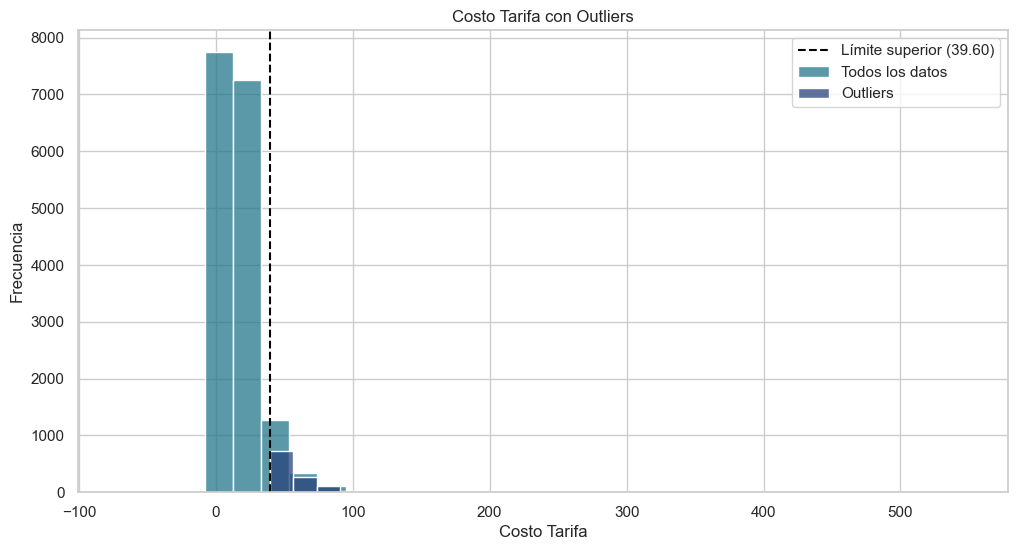

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(green['Costo tarifa'], bins=30, kde=False, color=sns.color_palette('crest', as_cmap=True)(0.6), label='Todos los datos')

# Crear un histograma de los outliers sobre el mismo gráfico
sns.histplot(outliers['Costo tarifa'], bins=30, kde=False, color=sns.color_palette('crest', as_cmap=True)(0.9), label='Outliers')

# Añadir detalles al gráfico
plt.axvline(x=lim_sup, color='black', linestyle='--', label=f'Límite superior ({lim_sup:.2f})')
plt.title('Costo Tarifa con Outliers')
plt.xlabel('Costo Tarifa')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### En el gráfico se evidencia que: 
#### Distribución: 
La mayoría de los costos de tarifa se concentran entre 0 y 50. Esto significa que la mayoría de los viajes tienen un costo relativamente bajo.
#### Valores atípicos: 
La línea vertical negra marca un límite a partir del cual se consideran los datos como "outliers". Al parecer, hay una cantidad significativa de viajes con costos de tarifa muy altos, por encima de este límite. Estos valores atípicos podrían corresponder a viajes especiales, errores en los datos o situaciones excepcionales.
#### Valores negativos: 
También se observan algunos viajes con costos de tarifa negativos. Esto podría indicar errores en los datos, reembolsos o algún tipo de descuento.

### El gráfico evidencia que:
#### Distribución: 
La mayoría de los costos de tarifa se concentran entre 0 y 50. Esto significa que la mayoría de los viajes tienen un costo relativamente bajo.
#### Valores atípicos:
La línea vertical negra marca un límite a partir del cual se consideran los datos como "outliers". Al parecer, hay una cantidad significativa de viajes con costos de tarifa muy altos, por encima de este límite. Estos valores atípicos podrían corresponder a viajes especiales, errores en los datos o situaciones excepcionales.
#### Valores negativos: 
También se observan algunos viajes con costos de tarifa negativos. Esto podría indicar errores en los datos, reembolsos o algún tipo de descuento.

Se grafica la distribución de las tarifas sin outliers

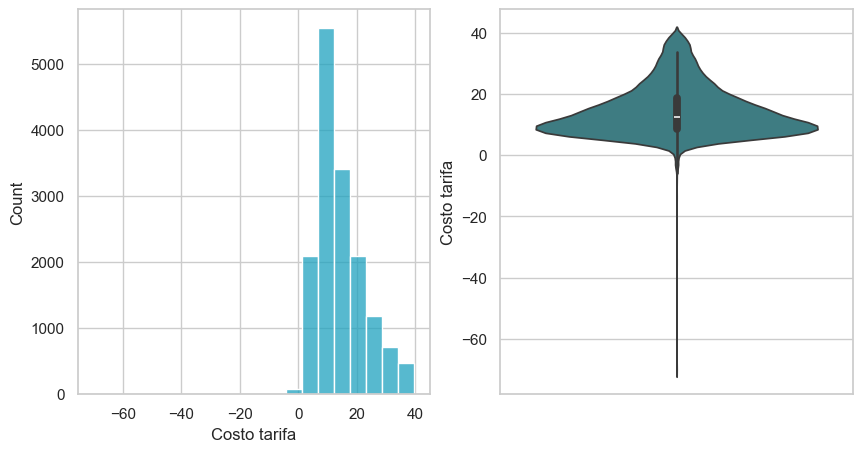

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize= (10,5))

ax1 = sns.histplot(green[green['Costo tarifa'] < lim_sup]['Costo tarifa'], bins=20, ax= ax1, color='#1FA2BF')
ax2 = sns.violinplot(green[green['Costo tarifa'] < lim_sup]['Costo tarifa'], ax= ax2, palette='crest')

### Interpretación del histograma:
La mayoría de los costos de las tarifas se concentran entre 0 y 20. Es decir, la mayor parte de los viajes tienen un costo que cae dentro de este rango.
Hay una cantidad considerable de viajes con un costo de tarifa cercano a 0. Esto podría indicar que hay una tarifa base o mínima que se aplica a todos los viajes, independientemente de la distancia o duración.
También se observan algunos viajes con costos de tarifa negativos. Esto podría ser un error en los datos o representar algún tipo de reembolso o descuento.

### nterpretación del gráfico de violín:
Confirma lo que vimos en el histograma: la mayoría de los datos se concentran alrededor de 0 y 20.
La forma del violín nos indica que la distribución de los datos es ligeramente asimétrica, con una cola más larga hacia los valores negativos. Esto sugiere que hay más valores atípicos (valores muy alejados del promedio) en la parte negativa de la distribución.
La línea negra dentro del violín representa la mediana, que también se encuentra cerca de 0, lo que confirma que la mayoría de los costos de las tarifas están por encima de este valor.

### Conclusiones generales:
#### Distribución sesgada: 
Los datos están sesgados hacia la izquierda, lo que significa que hay una mayor concentración de valores bajos (costos de tarifa cercanos a 0) en comparación con los valores altos.
#### Presencia de valores atípicos: 
Existen algunos valores atípicos, especialmente en la parte negativa de la distribución. Estos valores podrían ser errores en los datos o representar situaciones especiales.
#### Mayoría de costos bajos: 
La mayoría de los viajes tienen un costo de tarifa relativamente bajo.

Diagrama de dispersión.

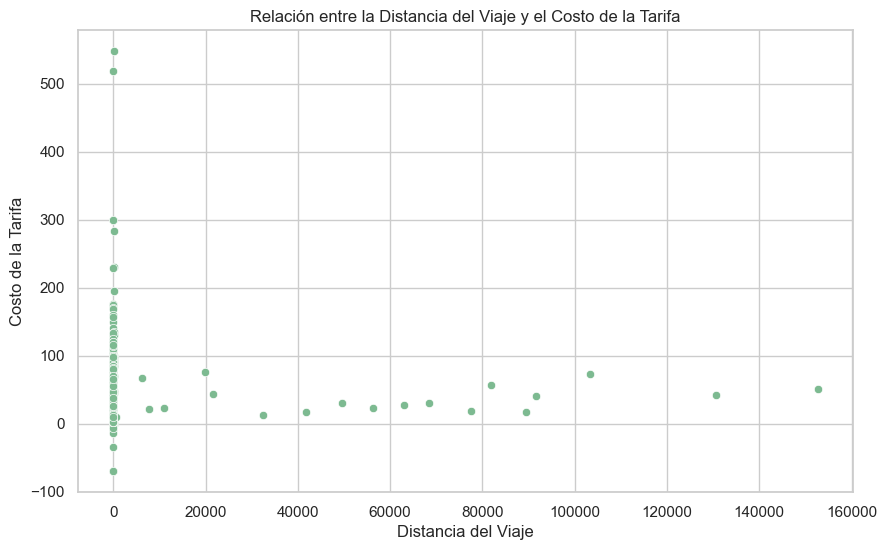

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=green, x='Distancia viaje', y='Costo tarifa', palette='crest')
plt.title('Relación entre la Distancia del Viaje y el Costo de la Tarifa')
plt.xlabel('Distancia del Viaje')
plt.ylabel('Costo de la Tarifa');

### Al observar el gráfico, podemos notar lo siguiente:
#### No hay una relación clara: 
A diferencia de lo que podríamos esperar intuitivamente, no se observa una relación directa entre la distancia del viaje y el costo de la tarifa. Es decir, no podemos decir que a mayor distancia, mayor sea el costo.
#### Dispersión de los datos:
Los puntos están bastante dispersos en todo el gráfico, lo que indica que el costo de la tarifa no depende únicamente de la distancia.
#### Valores atípicos:
Hay algunos puntos que se encuentran alejados de la mayoría de los datos, especialmente en el eje de la distancia. Estos puntos podrían corresponder a viajes con características especiales (por ejemplo, viajes en hora punta, viajes con múltiples paradas, etc.) o a errores en los datos.
#### Costos bajos:
La mayoría de los costos de la tarifa se concentran en la parte inferior del gráfico, lo que indica que la mayoría de los viajes tienen un costo relativamente bajo.

Matriz de correlación

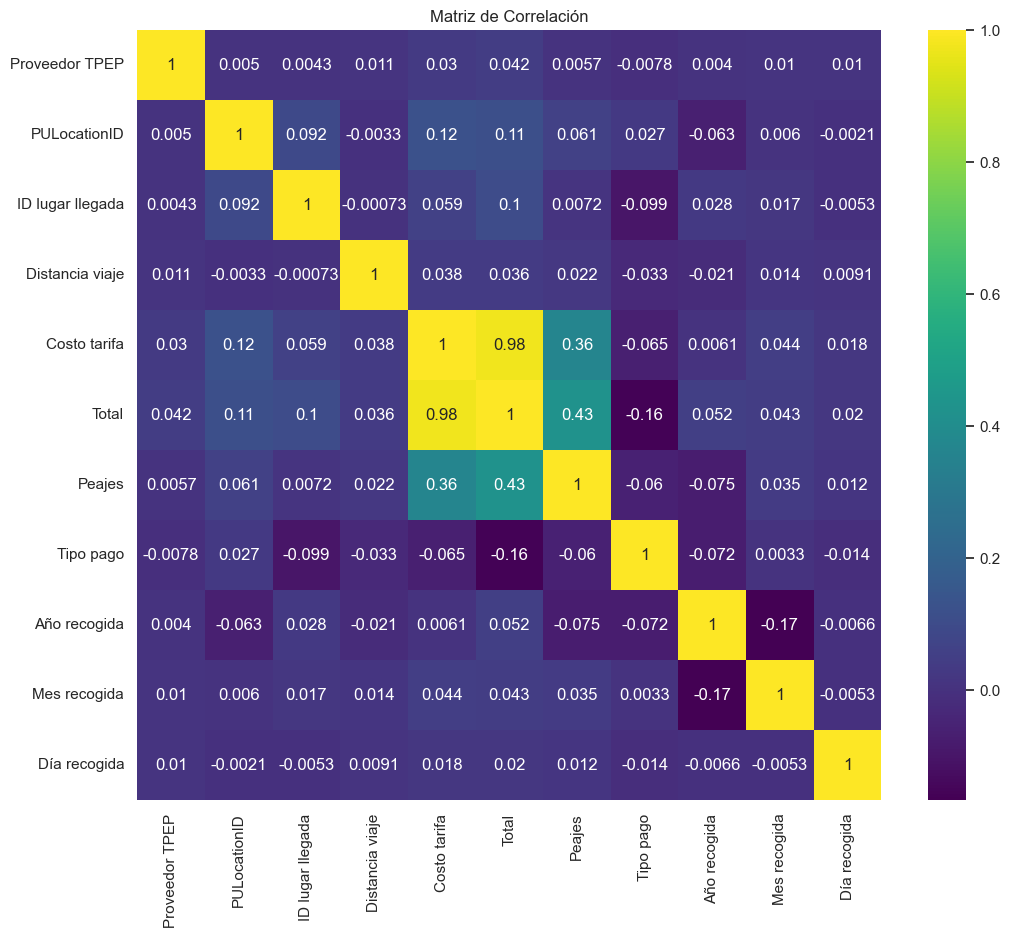

In [22]:
numeric_columns = green.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Matriz de Correlación');

### Interpretación de los resultados.
#### Alta correlación entre costo de tarifa, total y distancia de viaje: 
Las variables "Costo tarifa", "Total" y "Distancia viaje" muestran una correlación positiva muy fuerte entre sí. Esto es lógico, ya que generalmente a mayor distancia, mayor será el costo total del viaje, y este costo total estará muy relacionado con el costo base de la tarifa.
#### Otras correlaciones: 
También podemos observar otras correlaciones interesantes, como la relación entre "Total" y "tolls_amount" (importe de peajes). Esta correlación positiva indica que a mayor costo total del viaje, es más probable que se hayan pagado más peajes.
#### Correlaciones débiles o nulas: 
Hay varias variables que presentan correlaciones débiles o nulas con el resto, como "Unnamed: 0", "Proveedor TPEP" y "PULocationID". Esto sugiere que estas variables podrían no estar muy relacionadas con las otras variables del conjunto de datos.

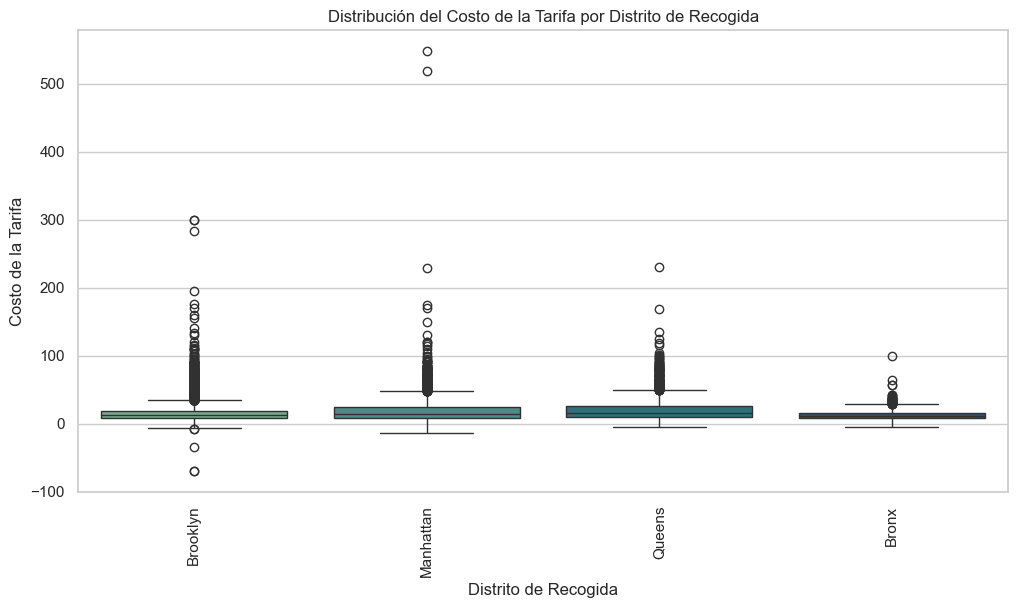

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=green, x='Distrito recogida', y='Costo tarifa', palette='crest')
plt.title('Distribución del Costo de la Tarifa por Distrito de Recogida')
plt.xlabel('Distrito de Recogida')
plt.ylabel('Costo de la Tarifa')
plt.xticks(rotation=90)
plt.show()

Cada caja representa un distrito (Queens, Brooklyn, Manhattan y Bronx), y dentro de cada caja se resumen varios aspectos del costo de la tarifa.
### Interpretación de los resultados:
Al observar el gráfico, podemos extraer las siguientes conclusiones:
#### Variabilidad en los costos: 
Los costos de las tarifas varían considerablemente entre los diferentes distritos.
#### Manhattan presenta los costos más altos:
La caja de Manhattan se encuentra en una posición más elevada que las de los otros distritos, lo que indica que, en promedio, las tarifas en Manhattan son más altas.
#### Queens presenta los costos más bajos: 
La caja de Queens se encuentra en una posición más baja, lo que sugiere que las tarifas en Queens tienden a ser más económicas.
#### Presencia de valores atípicos: 
En todos los distritos se observan valores atípicos, tanto por encima como por debajo del rango intercuartílico. Estos valores atípicos podrían corresponder a tarifas especiales, errores en los datos o situaciones particulares que hacen que el costo de la tarifa se desvíe significativamente del promedio.

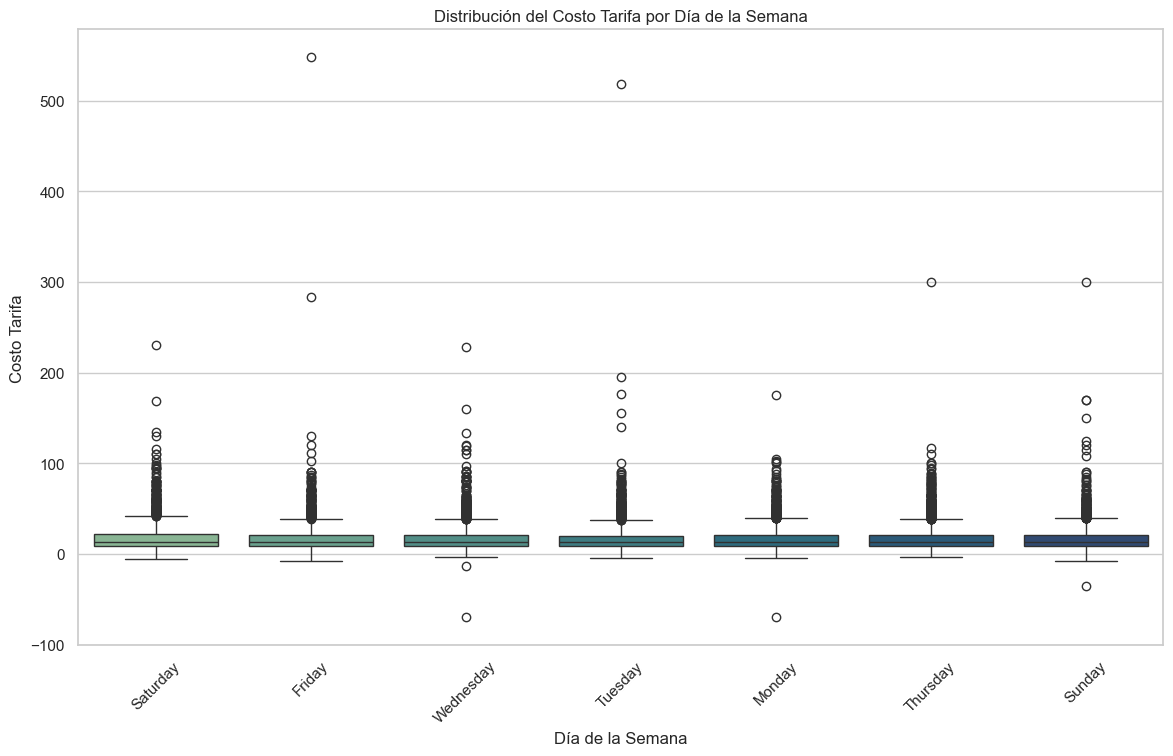

In [24]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Día semana recogida', y='Costo tarifa', data=green, palette='crest')
plt.title('Distribución del Costo Tarifa por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Costo Tarifa')
plt.xticks(rotation=45)
plt.show()


### Del gráfico podemos inferir que: 
Existe una clara relación entre el día de la semana y el costo de la tarifa.
Los fines de semana, especialmente los sábados, suelen ser los días más caros.
Los días de semana, particularmente los miércoles y jueves, tienden a tener los costos promedio más bajos.

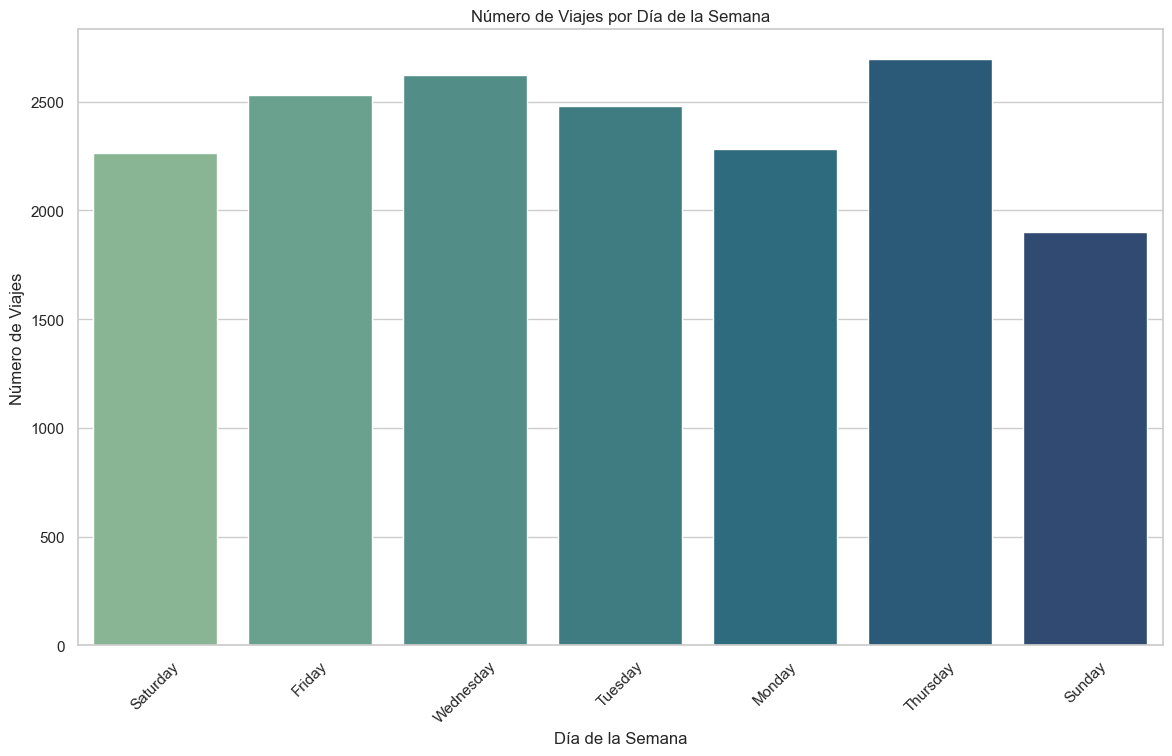

In [25]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Día semana recogida', data=green, palette='crest')
plt.title('Número de Viajes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45)
plt.show()


### Del gráfico podemos inferir que: ¿Qué podemos inferir?
#### Días con mayor demanda:
##### Miércoles: 
Es el día que registra el mayor número de viajes, superando a todos los demás días de la semana. Esto indica que los miércoles son, en promedio, los días más activos en términos de movimiento o actividad relacionada con los viajes.
###### Jueves y Lunes: 
Le siguen en popularidad los jueves y lunes, con un número de viajes considerablemente alto.
#### Días con menor demanda:
##### Sábado: 
Contrario a lo que podría esperarse, el sábado presenta el menor número de viajes. Esto podría sugerir que muchas personas aprovechan este día para descansar o realizar actividades que no requieren desplazamientos.
##### Domingo: 
El domingo también muestra un número de viajes relativamente bajo, lo que corrobora la tendencia de menor actividad durante los fines de semana.
#### Patrones semanales:
##### Media semana: 
La mitad de la semana, desde el martes hasta el jueves, muestra los números más altos de viajes, lo que sugiere que la mayor parte de la actividad se concentra en estos días.
##### Fin de semana: 
Tanto el sábado como el domingo presentan los números más bajos, indicando una disminución significativa en la actividad durante el fin de semana.
#### Adicionalmente:
Aunque existe una tendencia clara de mayor actividad a mediados de semana y menor actividad los fines de semana, es importante notar que hay una cierta variabilidad entre los días. Por ejemplo, la diferencia entre el miércoles y el jueves no es tan marcada como la diferencia entre el miércoles y el sábado.
#### Esta variabilidad podría estar influenciada por diversos factores como:
##### Días laborales: Los días de semana, especialmente de martes a jueves, suelen ser días laborales para la mayoría de las personas, lo que explica el alto número de viajes.
##### Actividades de fin de semana: 
Los fines de semana están asociados con actividades de ocio, visitas a familiares o amigos, y otros eventos que pueden implicar menos desplazamientos.

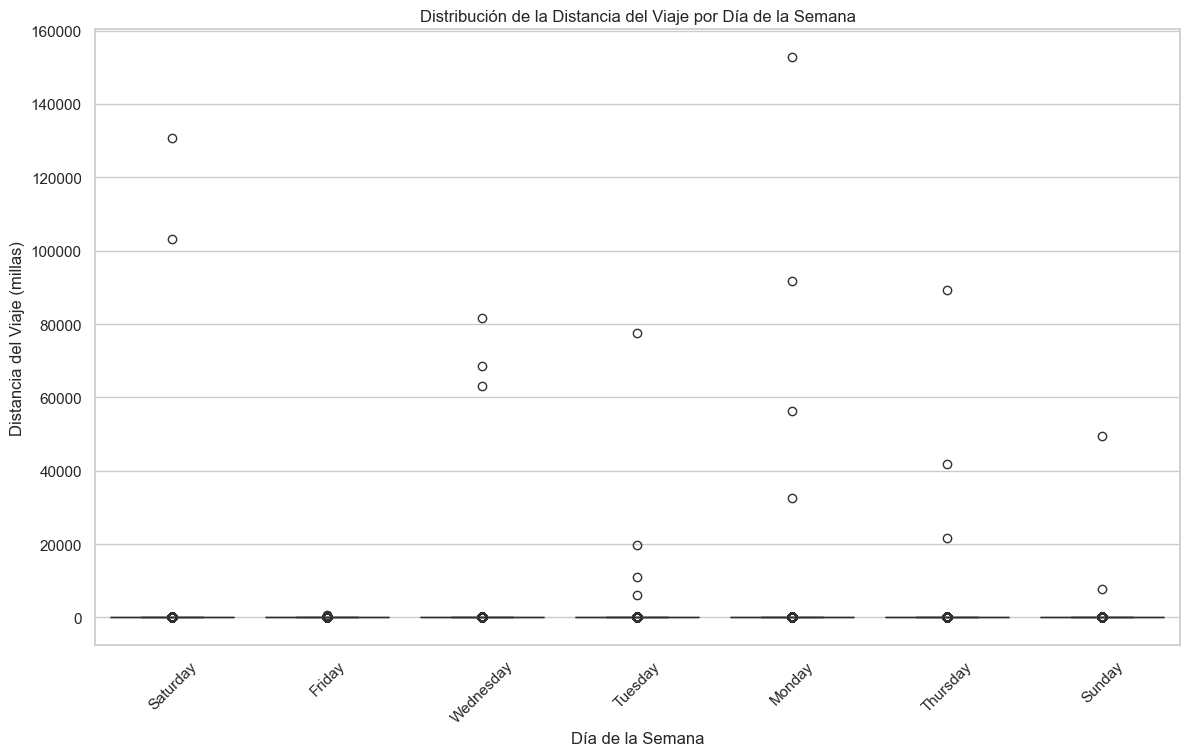

In [26]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Día semana recogida', y='Distancia viaje', data=green, palette='crest')
plt.title('Distribución de la Distancia del Viaje por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Distancia del Viaje (millas)')
plt.xticks(rotation=45)
plt.show()


### Del gráfico podemos inferir que: 
#### Concentración en distancias cortas: 
La mayoría de las distancias recorridas se concentran en valores muy bajos, cercanos a cero, para todos los días de la semana. Esto sugiere que la mayor parte de los viajes son relativamente cortos.
#### Pocos outliers: 
La presencia de pocos outliers (puntos fuera de los bigotes) indica que hay pocos viajes extremadamente largos en comparación con la mayoría de los viajes.
#### Patrón consistente: 
Las cajas y los bigotes para todos los días de la semana son muy similares, lo que sugiere que no hay diferencias significativas en las distancias recorridas entre un día y otro.
#### Ausencia de patrones claros:
No se observa un patrón claro de aumento o disminución de las distancias a lo largo de la semana.

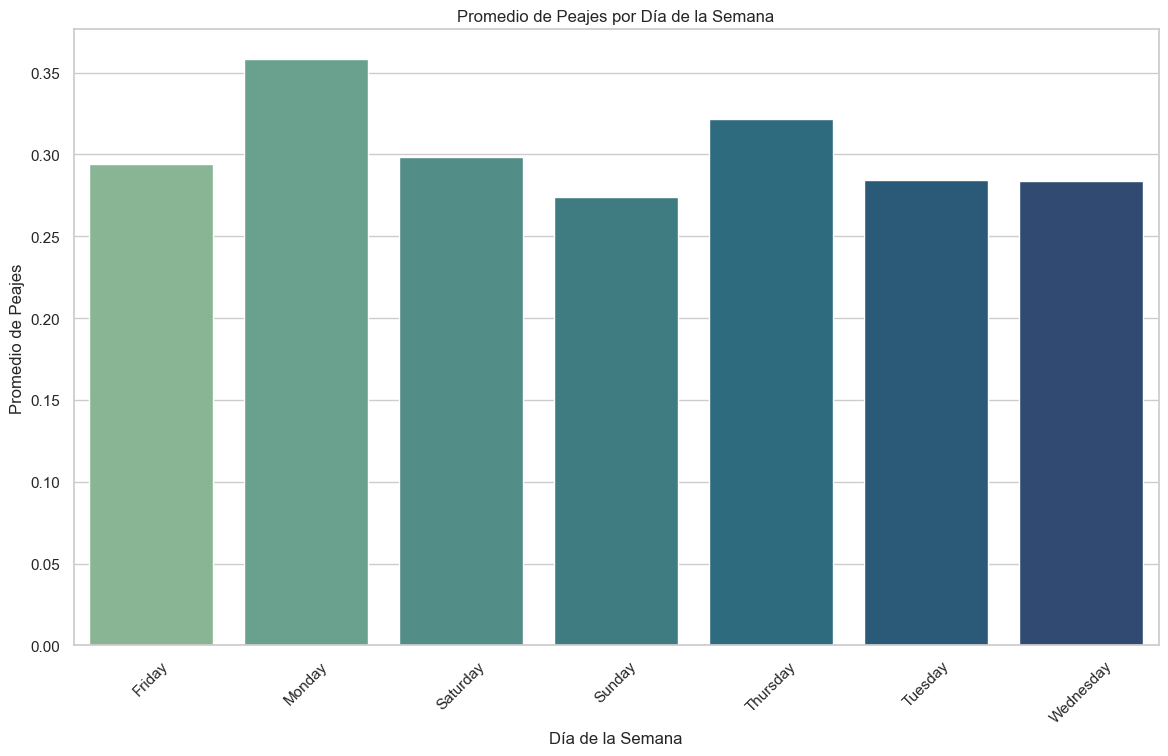

In [27]:
peajes_por_dia = green.groupby('Día semana recogida')['Peajes'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='Día semana recogida', y='Peajes', data=peajes_por_dia, palette='crest')
plt.title('Promedio de Peajes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio de Peajes')
plt.xticks(rotation=45)
plt.show()


### Del gráfico es posible inferir que: 
#### Días con mayor promedio de peajes:
##### Lunes: 
Es el día con el promedio de peajes más alto, lo que sugiere que los usuarios de la vía en cuestión tienden a pagar más peajes los lunes.
##### Viernes: 
Le sigue en promedio de peajes el viernes, indicando también una alta frecuencia de pagos en este día.
#### Días con menor promedio de peajes:
##### Domingo y Miércoles: 
Ambos días presentan los promedios de peajes más bajos, lo que podría indicar una menor actividad en la vía durante estos días.
#### Patrones semanales:
##### Inicio y final de semana: 
Tanto los lunes como los viernes, que suelen ser el inicio y el final de la semana laboral, presentan promedios de peajes elevados. Esto podría indicar que muchos usuarios realizan viajes relacionados con el trabajo durante estos días.
##### Medio de semana: 
Los días de en medio de la semana, como miércoles y domingo, muestran promedios de peajes más bajos, lo que podría sugerir una menor actividad relacionada con el trabajo o los estudios.

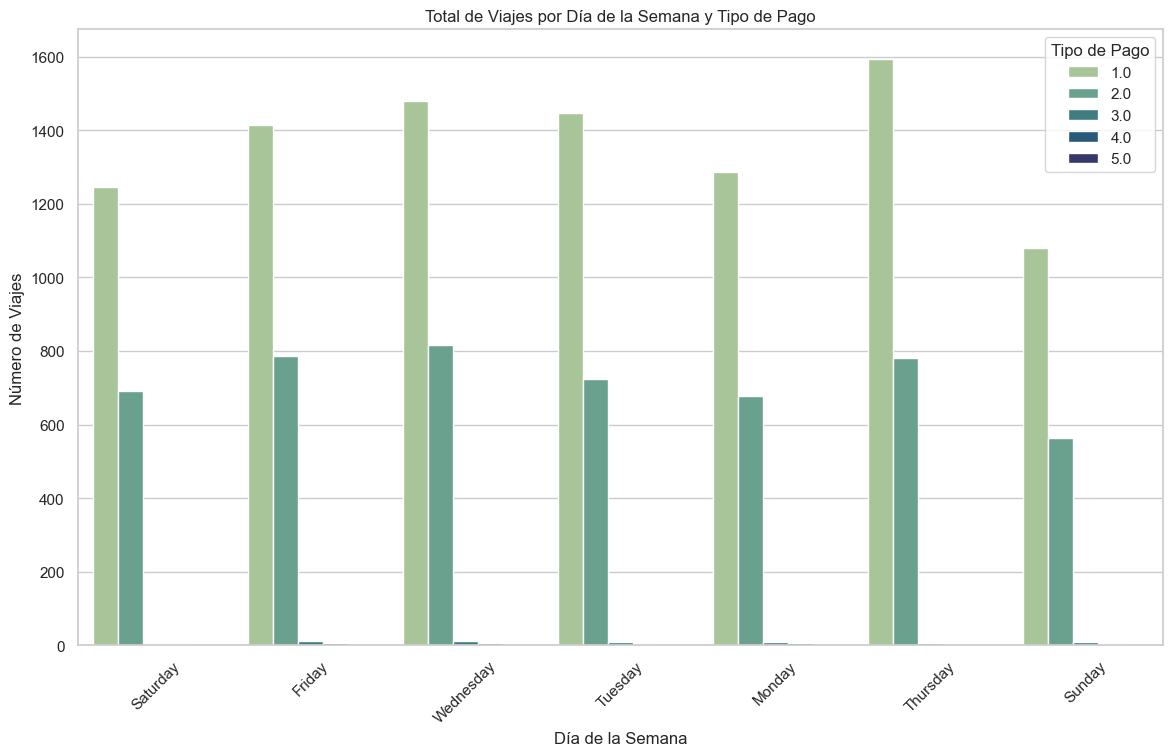

In [28]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Día semana recogida', hue='Tipo pago', data=green, palette='crest')
plt.title('Total de Viajes por Día de la Semana y Tipo de Pago')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Pago')
plt.show()
